# Real-world Data: Noise, Variability, Errors — and Outliers

This notebook gives students a quick, practical view of:
- What **noise**, **variability**, and **errors** are in real datasets.
- How they affect **linear regression**.
- How a single **outlier** can distort a model.

We'll use small synthetic datasets so the visuals are easy to understand.

## 1) Real datasets: noise, variability, and errors (quick notes)
- **Noise**: random fluctuations that don't follow the true pattern (e.g., sleep, mood, distractions).
- **Variability**: natural differences between cases (e.g., two students study the same hours but perform differently).
- **Errors**: mistakes in measurement or data entry (e.g., typing 700 instead of 70).

**Takeaway:** Clean data is rare. Real data has variability and some noise; occasional errors and outliers can mislead models.

### Dataset A: Advertising spend vs Sales (with variability)
We'll start with a simple dataset that has a clear upward trend plus some noise.

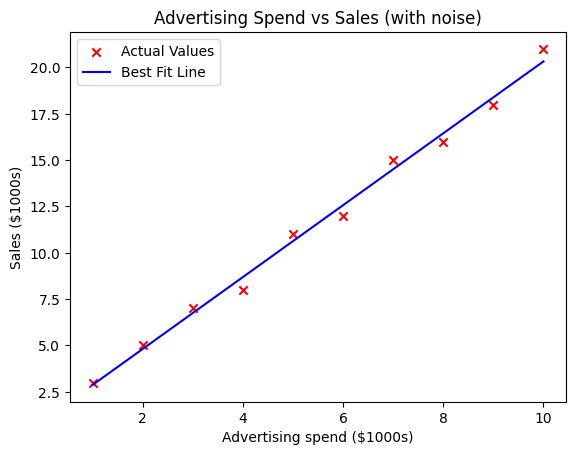

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Advertising spend (in $1000s)
X2 = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])

# Sales (in $1000s), with some randomness (noise) added
y2 = np.array([3, 5, 7, 8, 11, 12, 15, 16, 18, 21])

# Create and fit the model
model = LinearRegression()
model.fit(X2, y2)

# Predictions
y_pred2 = model.predict(X2)

# Plot actual points vs regression line
plt.scatter(X2, y2, color='red', marker='x', label='Actual Values')
plt.plot(X2, y_pred2, color='blue', label='Best Fit Line')
plt.xlabel("Advertising spend ($1000s)")
plt.ylabel("Sales ($1000s)")
plt.title("Advertising Spend vs Sales (with noise)")
plt.legend()
plt.show()


### Notes
- Points are scattered around the line due to **noise** and **variability**.
- The model still captures the main **signal** (upward trend).
- **Lower MSE** and **higher R²** indicate a good fit; they won't be perfect because of noise.

## 2) Outliers: definition and impact
- An **outlier** is a point far from the general pattern.
- In least squares regression, outliers get extra influence because errors are **squared**.
- A single outlier can **pull the regression line** and reduce generalisation.i.e the regression line may be pulled toward the outlier, even if the rest of the data fits a different line well.

Outliers distort the line of best fit.

Regression assumes the data roughly follows a straight-line relationship — outliers violate that.

This is why we sometimes:

Detect & remove outliers before fitting.

Or use robust regression methods that are less sensitive to them.

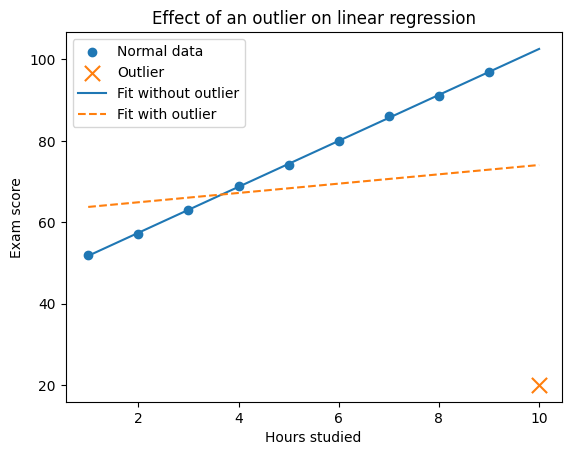

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Baseline linear-looking data (hours studied vs exam score)
X_clean = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9]])
y_clean = np.array([52, 57, 63, 69, 74, 80, 86, 91, 97])

# Add one extreme outlier
X = np.append(X_clean, [[10]], axis=0)
y = np.append(y_clean, [20])   # unusually low score at high study time

# Fit models
model_clean = LinearRegression().fit(X_clean, y_clean)
model_out = LinearRegression().fit(X, y)

# Smooth x-axis for lines
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_line_clean = model_clean.predict(x_line)
y_line_out = model_out.predict(x_line)

# Plot: data + both fits
plt.figure()
plt.scatter(X_clean, y_clean, label='Normal data')
plt.scatter([10], [20], marker='x', s=120, label='Outlier')
plt.plot(x_line, y_line_clean, label='Fit without outlier')
plt.plot(x_line, y_line_out, linestyle='--', label='Fit with outlier')
plt.xlabel('Hours studied')
plt.ylabel('Exam score')
plt.title('Effect of an outlier on linear regression')
plt.legend()
plt.show()

### Wrap-up
- Real data has **variability** and **noise**; linear regression can still capture the main trend.
- **Outliers** can distort the fit; always **visualise** and consider simple detection checks.
- Prefer **residual-based** checks when teaching regression, and compare results to Z-score / IQR.